# A Titanic Task
In April 1912, *The Titanic*--the world's largest ship at the time, hit an iceberg in the northern Atlantic and sank.  Over 1500 of the 2200 passengers on board died.  I have given you the real data for those who survived and did not survive *The Titanic* disaster in 1912. Your ultimate goal is to understand who lived and died on *The Titanic*

Data were downloaded from http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls.

## Data Dictionary
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
* survived: 0 = No, 1 = Yes 
* sex: male, female 
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: # of siblings / spouses aboard the Titanic 
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: # of parents / children aboard the Titanic 
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch = 0 for them.* ticket: Ticket number 
* fare: Passenger fare 
* cabin: Cabin number 
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
* boat: If boat has a value, it indicates the number of the rescue boat. The value of 0 indicates that the person was not in a rescue boat--that is, that the person died.
* body: If body has a value, it indicates the number of the tagged body. The value of 0 indicates that the person did not have a tag--that is, that the person lived.

### SPECIFICATIONS
1-2 page memo that includes the following:
* An explanation of the gini coefficient and how it evolves through your decision tree
* A graphviz-generated decision tree
* The model's score (accuracy) 
* Which feature was most important in your model?
* Using the included features in your decision tree, create three people who could have been on *The Titanic*.  
  * Do a prediction of whether they lived or died.  Report the probability and the class.
Using this information, discuss why your model made the prediction that it did.

Appendix.  Important: do not just dump all your analysis into your submission.  Instead, include only what makes sense for me to read, and that supports the analysis in your memo:
* Do some swimming in the data (Hmmmm...perhaps an unfortunate choice of words....): what did you find in your preliminary analysis? Include an analysis of missing values and any outliers.  **This is very important, since you need to be sure of missing values, etc. before continuing.**
  * Examine the presence of missing values.  If some exist, be careful! A poor approach is to simply delete all missing values.  If you do, you may lose a significant amount of data.  A better approach is to reduce the dataframe first to only the columns you plan to use.  THEN remove the missing values from this subset. See below for an example.
  * Do some plots, possibly examining different groups 
  * Run some descriptive statistics, including some group by analysis
  * Recall that the average of a binary column is the percentage of 1's in the column
* Do some feature engineering, including coding the sex (or any other categorical variable) with get_dummies or using the Panda loc method.



### IMPORTANT: 
  * There are a lot of missing values in this dataset! 
  * Don't use dropna too early.  
  
For example:

In [55]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passengerid,1309.0,655.000000,378.020061,1.0000,328.0000,655.0000,982.000,1309.0000
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,1309.0,14.864782,55.197471,0.0000,0.0000,0.0000,0.000,328.0000


passengerid    1309
pclass         1309
survived       1309
name           1309
sex            1309
age            1309
sibsp          1309
parch          1309
ticket         1309
fare           1309
cabin          1309
embarked       1309
boat           1309
body           1309
destination    1309
dtype: int64

In [50]:
# Looking for trends with people who have survived or interesting statisitcs
df.groupby("survived").describe().transpose()

survived                     0            1
age         count   619.000000   427.000000
            mean     30.545369    28.918228
            std      13.922539    15.061481
            min       0.333300     0.166700
            25%      21.000000    20.000000
            50%      28.000000    28.000000
            75%      39.000000    38.000000
            max      74.000000    80.000000
body        count   809.000000   500.000000
            mean     24.051916     0.000000
            std      68.635930     0.000000
            min       0.000000     0.000000
            25%       0.000000     0.000000
            50%       0.000000     0.000000
            75%       0.000000     0.000000
            max     328.000000     0.000000
fare        count   808.000000   500.000000
            mean     23.353831    49.361184
            std      34.145096    68.648795
            min       0.000000     0.000000
            25%       7.854200    11.214600
            50%      10.500000    26.000000
            75%      26.000000    57.750000
            max     263.000000   512.329200
parch       count   809.000000   500.000000
            mean      0.328801     0.476000
            std       0.912332     0.776292
            min       0.000000     0.000000
            25%       0.000000     0.000000
            50%       0.000000     0.000000
            75%       0.000000     1.000000
            max       9.000000     5.000000
passengerid count   809.000000   500.000000
            mean    742.254635   513.822000
            std     357.093804   368.483767
            min       3.000000     1.000000
            25%     457.000000   192.500000
            50%     769.000000   444.500000
            75%    1056.000000   820.250000
            max    1309.000000  1301.000000
pclass      count   809.000000   500.000000
            mean      2.500618     1.962000
            std       0.744825     0.872972
            min       1.000000     1.000000
            25%       2.000000     1.000000
            50%       3.000000     2.000000
            75%       3.000000     3.000000
            max       3.000000     3.000000
sibsp       count   809.000000   500.000000
            mean      0.521632     0.462000
            std       1.210449     0.685197
            min       0.000000     0.000000
            25%       0.000000     0.000000
            50%       0.000000     0.000000
            75%       1.000000     1.000000
            max       8.000000     4.000000

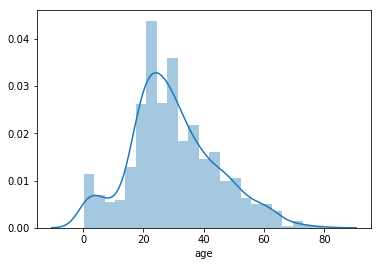

In [54]:
import seaborn as sns
sns.distplot(df2.age)

In [48]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [29]:
temp = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','cabin', 'survived']]
temp.groupby(["survived"]).mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [30]:
# Creating a copy of the original database with pclass, survived, and age.
df2 = df[['pclass', 'survived', 'age']].copy()
# Drop all rows with missing values
df2 = df2.dropna()
df2.shape

(1046, 3)

In [31]:
# y is to see who survives
# X is the features in the cesison tree
y = df2['survived']
X = df2[['pclass', 'age']]

In [32]:
from sklearn import tree
db_tree = tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
db_tree = db_tree.fit(X, y)

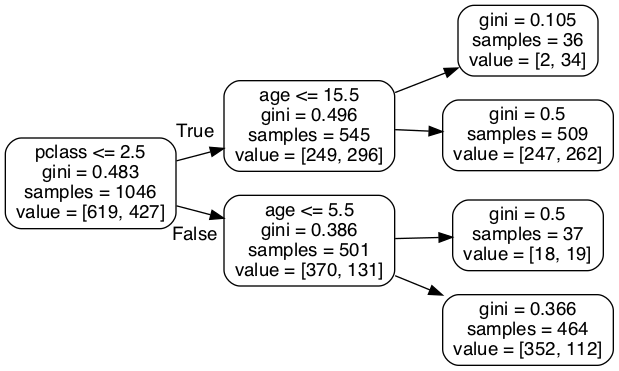

In [33]:
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [34]:
# Shows the percentage of how important the features are for classification
db_tree.feature_importances_

array([0.70304156, 0.29695844])

In [35]:
# To determine how accurate the decision tree is
accuracy = db_tree.score(X,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 63.77% accurate.


In [36]:
# Creating a predictions column out of the features
df2['predictions'] = db_tree.predict(df2[['pclass', 'age']])

In [37]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df2['survived'], df2['predictions'])
cm

array([[352, 267],
       [112, 315]])

In [47]:
# Predicting three peoples likehood of surviving based on ticket class and age
print(db_tree.predict([[1,47]]))
print(db_tree.predict([[2,35]]))
print(db_tree.predict([[3,29]]))
print(db_tree.predict([[3,4]]))

[1]
[1]
[0]
[1]


# THE TITANIC MEMO

**Swimming in Data**

I chose to analyze people survived to see if anything intresting popped out:

**Age:** People who did not survive tended to be older and you can see that by the mean.

**Pclass:** People who did not survive also tended to be at a higher ticket level which is also told by the mean.

I am going to tear these two categories open and learn about the effect they have on whether someone survives or not.

**What is the gini score?**

The gini score is a measure of inequality of distribution or in english, the probability of a particular variable being wrongly classified when it is randomly chosen which means you want a lower gini score for less inequality. The first node has the lowest gini score of 0.105. The two nodes in the middle have results that are split basically 50/50 and have gini scores at the highest in the tree which is 0.5 which means the inequality of distribution was at its highest. So the first node with the lowest gini score has the best classification.

**Interpreting the tree:**

The predicted accuracy of the tree was 63.77%, which is not the best but gives us a better chance then flipping a coin.


* Upper path for people who have a ticket level <= 2.5, 249/545 do not survive
  * for people who are or above the of the age<=15.5, 2/36 do not survive
  * for people who are younger than the age>15.5, 247/509 do not survive
* Lower path for people who have a ticket level > 2.5, 370/501 do not survive
  * for people who are or above the of the age<= 5.5, 18/37 do not survive
  * for people who are younger than the age> 5.5, 352/464 do not survive

So between the upper and lower path, people who tend to have a ticket level (pclass) that is lower we have a better chance of survival. It also shows that kids had a higher chance of survival which makes sense because (I hate to refer to the movie but) women and children were primarly put on the lifeboats first. If you think about it, a child in first class would be one of the first to be helped off the boat. 
  
**Feature_importances_ function:**
  
The feature_importance_ function shows us which feature of the two, pclass and age, is more important for the classification on determining wether someone survived or not. Using the feature_importances function we found that the listed features in the order pclass then age, indicates that the ticket class (pclass) is 70% important, while age is only about 30% important in the classification of whether someone survived the titanic shipwreck.

**The Confusion Matrix:**

array([[352, 267],
      [112, 315]])
       
The diagonal from upper left, 352, to lower right, 315, are the predictions that are correct.  Of the people who did not survive, we predicted 352 correctly. Of the people who had survived, we predicted 315 correctly. The upper right corner would be considered false positives: people who do really did not survive, but were falsely predicted to survive which would be 267 people.  The lower left corner are the false negatives. They represent the group that we thought were dead, but actually survived.

**Putting our model into an example:**

If we wanted to guess at random if someone did not survive by ticket level and age, we can throw out the model and still be 619/1046 = 59\% accurate simply by always guessing that they did not! As long as our model is this accurate, we can say we have an okay model

Referring to our model now, if we want to see if someone survived:
* if our model predicts someone did not survive, we would be correct 352/464, or about 76\% of the time.  That is a marginal improvement over 59\%. 
* if our model predicts someone survives, we would be correct about 315/582 or 54\% of the time. This is again only a marginal improvement over the base of 41\%. This is also bad for our model, because 46\% of the time we are predicting people died when they actually survived.

**Lets predict the fate of the random individuals:**

We used three different people to formulate an example:
* One with the pclass of 1 and an age of 47, this person was predicted to survive.
* One with the pclass of 2 and an age of 35, this person was also predicted to survive.
* One with the plclass of 3 and an age of 29, this person was also predicted to survive.

This alligns with the model on the fact that people who have a lower pclass were more likely to survive which makes sense. People with a lower pclass I assume are more elite. So there is a probability that during the crash, those people were put on lifeboats first resulting in a higher survival rate. In contrast, people who had a pclass of three could have been tended to last. A good example would be if you were first class on a plane, you get to be one of the first people off of it while the people in the back have to wait for everyone else. I think the model makes sense but also in an emergency, anything goes and I feel that it is every man for himself so there could be a lot more attributes for if someone survived or not.

I also got intrested and tested out one more prediction of a child in third class and it turns out, if you were a young child, you were more likely predicted to have escaped the titanic alive. A 4 year old child in third class was predicted to survive making me assume that the movie was correct and did gave priority to children getting on lifeboats.

**Using get_dummies:**

I created a groupby for men to see if more of one sex survived more than the other. 1 was for men and 0 was for women. In my analysis, I found that 75% of women survived and only 20% of men survived in total. Referring back to what I said before, this confirms that people on board did in fact help women and children first onto the lifeboats since it seems that young children and women had the best chance of survival.

### Using get_dummies 
The get_dummies method transforms categorical data into binary columns. The following illustrates how to generate the binary columns, then add the new binary columns back to the dataframe.

In [51]:
# first, subset df into the features of interest
# df2 will be ALL the features we may explore at some point.
df3 = df[['pclass', 'survived', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin']].copy()

In [65]:
# temp contains only the generated binary columns
df3.dropna()
temp = pd.get_dummies(df.sex, drop_first = True)
temp.head()

# the new male column is 1 for men and 0 for women:

,male
0,0
1,1
2,0
3,1
4,1


In [66]:
# because temp contains ONLY the binary column, add it back into df2 using concat:
df3 = pd.concat([df2, temp], axis=1)
df3.head()

,pclass,survived,age,predictions,male
0,1.0,1.0,48.0,1.0,0
1,1.0,1.0,49.0,1.0,1
2,1.0,1.0,30.0,1.0,0
3,NaN,NaN,NaN,NaN,1
4,1.0,1.0,54.0,1.0,1


In [68]:
temp = df3[['pclass', 'age','male', 'survived']]
temp.groupby(["male"]).mean()

,pclass,age,survived
male,,,
0,2.048969,28.687071,0.752577
1,2.300912,30.585233,0.205167
